# ML Ops Zoomcamp Homework #1

Predicting the duration of a ride from pick up and drop off locations



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pd.options.display.float_format = '{:,.2f}'.format


We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2023.

In [2]:
# January - https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
# February - https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

In [3]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.00,0.97,1.00,N,161,141,2,9.30,1.00,0.50,0.00,0.00,1.00,14.30,2.50,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.00,1.10,1.00,N,43,237,1,7.90,1.00,0.50,4.00,0.00,1.00,16.90,2.50,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.00,2.51,1.00,N,48,238,1,14.90,1.00,0.50,15.00,0.00,1.00,34.90,2.50,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.00,1.90,1.00,N,138,7,1,12.10,7.25,0.50,0.00,0.00,1.00,20.85,0.00,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.00,1.43,1.00,N,107,79,1,11.40,1.00,0.50,3.28,0.00,1.00,19.68,2.50,0.00


Q1) Read the data for January. How many columns are there?

In [4]:
len(df_jan.columns.tolist())

19

Q2) What's the standard deviation of the trips duration in January?

Let's look at what the data shows without removing outliers

In [5]:
df_jan.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,"3,066,766.00",1.73,1.00,1.00,2.00,2.00,2.00,0.44
tpep_pickup_datetime,3066766,2023-01-17 00:22:26.288164,2008-12-31 23:01:42,2023-01-09 16:21:57.250000,2023-01-17 08:42:29.500000,2023-01-24 16:26:27,2023-02-01 00:56:53,NaN
tpep_dropoff_datetime,3066766,2023-01-17 00:38:06.427874,2009-01-01 14:29:11,2023-01-09 16:37:06,2023-01-17 08:58:30.500000,2023-01-24 16:42:49,2023-02-02 09:28:47,NaN
passenger_count,"2,995,023.00",1.36,0.00,1.00,1.00,1.00,9.00,0.90
trip_distance,"3,066,766.00",3.85,0.00,1.06,1.80,3.33,"258,928.15",249.58
RatecodeID,"2,995,023.00",1.50,1.00,1.00,1.00,1.00,99.00,6.47
PULocationID,"3,066,766.00",166.40,1.00,132.00,162.00,234.00,265.00,64.24
DOLocationID,"3,066,766.00",164.39,1.00,114.00,162.00,234.00,265.00,69.94
payment_type,"3,066,766.00",1.19,0.00,1.00,1.00,1.00,4.00,0.53
fare_amount,"3,066,766.00",18.37,-900.00,8.60,12.80,20.50,"1,160.10",17.81


In [6]:
df_jan['duration'] = (df_jan['tpep_dropoff_datetime'] - df_jan['tpep_pickup_datetime']).dt.total_seconds().div(60).astype(int)
df_jan.duration.describe()

count   3,066,766.00
mean           15.18
std            42.59
min           -29.00
25%             7.00
50%            11.00
75%            18.00
max        10,029.00
Name: duration, dtype: float64

In [7]:
df_jan.duration.min()

-29

Standard Deviation of duration

In [8]:
df_jan.duration.std()

42.59449915794647

Q3) Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

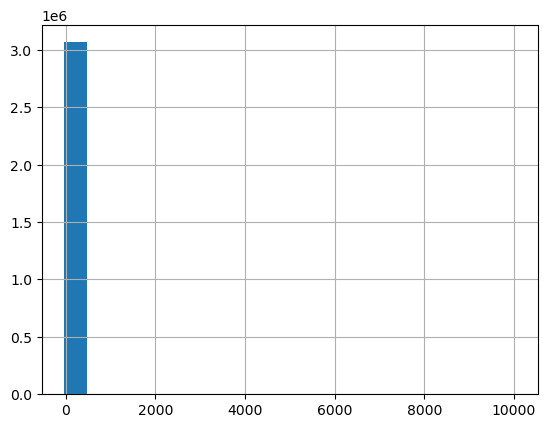

In [9]:
df_jan.duration.hist(bins=20)
plt.show()

We can't infer much because of big outliers

In [11]:
jan_size = df_jan.shape[0]
print(jan_size)

3066766


In [12]:
df_jan_cleaned = df_jan.loc[(df_jan['duration']>=1) & (df_jan['duration']<=60)]
df_jan_cleaned.shape

(3011044, 20)

In [13]:
jan_size_cleaned = df_jan_cleaned.shape[0]

print(f"Preliminary count was {jan_size} and after cleaning we have {jan_size_cleaned}")
print(f"Fraction of records left after dropping outliers is {(jan_size_cleaned)/jan_size * 100}")

Preliminary count was 3066766 and after cleaning we have 3011044
Fraction of records left after dropping outliers is 98.18303711466737


<Axes: >

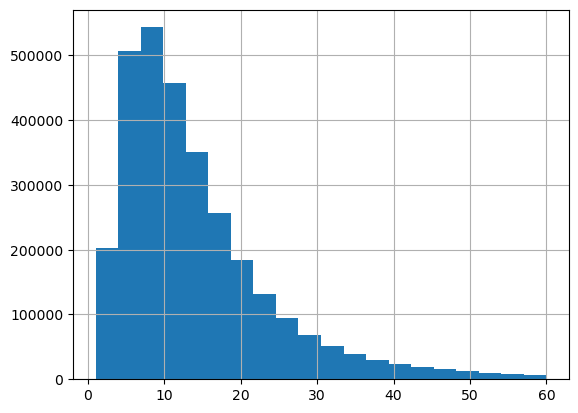

In [14]:
df_jan_cleaned.duration.hist(bins=20)

Most trips are short and around 10 minutes long while ther are some that are longer.

Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will 
  label encode them)
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [15]:
categorical = ['PULocationID','DOLocationID']
numerical = ['duration']

df = df_jan_cleaned.copy()
df[categorical] = df[categorical].astype(str)


In [16]:
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

X_train.shape, y_train.shape

((3011044, 515), (3011044,))

Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
score = mean_squared_error(y_train,y_train_pred, squared=False) # to get rmse
print(f"RMSE: {score}")

RMSE: 7.688653522854343


Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [18]:
def read_dataframe(filename):
    if filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
    
    df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds().div(60).astype(int)
    
    df = df[(df['duration'] >=1) & (df['duration']<60.0)]
    categorical = ['PULocationID','DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df

In [19]:
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.00,0.30,1.00,N,142,163,2,4.40,3.50,0.50,0.00,0.00,1.00,9.40,2.50,0.00,1
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.00,18.80,1.00,N,132,26,1,70.90,2.25,0.50,0.00,0.00,1.00,74.65,0.00,1.25,32
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.00,3.22,1.00,N,161,145,1,17.00,1.00,0.50,3.30,0.00,1.00,25.30,2.50,0.00,13
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.00,5.10,1.00,N,148,236,1,21.90,3.50,0.50,5.35,0.00,1.00,32.25,2.50,0.00,14
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.00,8.90,1.00,N,137,244,1,41.50,3.50,0.50,3.50,0.00,1.00,50.00,2.50,0.00,27


In [20]:

valid_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(valid_dicts)
target = 'duration'
y_val = df_val[target].values

In [21]:
y_val_pred = lr.predict(X_val)
val_score = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"RMSE for validation set is {val_score}")

RMSE for validation set is 7.814020734656204
